In [2]:
import pandas as pd
pd.options.display.min_rows = 10
import numpy as np
import matplotlib.pyplot as plt 

import geopandas as gpd
import cartopy.io.shapereader as shpreader
import geoplot
import geoplot.crs as gcrs
from shapely.geometry import Point

from fuzzywuzzy import process as fuzzy_process
from fuzzywuzzy import fuzz as fuzzy_basics

###################################################################################################################################################

def fuzzyMatch(input: str, options:list, threshold=80):

    matches = []
    for stringToCompareTo in options:
        ratio = fuzzy_basics.token_set_ratio(input, stringToCompareTo)
        matches.append([stringToCompareTo, ratio])

    bestMatch = sorted(matches, key=lambda item: item[1], reverse=True)[0]
    matchedString = bestMatch[0]
    matchedRatio = bestMatch[1]

    if matchedRatio > threshold:
        return matchedString
    else:
        return np.nan



In [2]:
###################################################################################################################################################
############################################################# historical map ######################################################################
###################################################################################################################################################

In [7]:
# convert into lat, lon (was in cartesian coordinates, ie. meters, originally)
mapDF = (
    gpd.read_file('../maps/historical map - vision of britain.org.uk\EW1851_regcounties.shp')
    .to_crs(epsg=4326) 
    .rename(columns={'G_NAME': 'county'})
)
mapDF.county = mapDF.county.str.title()
mapDF['label_coords'] = mapDF['geometry'].apply(lambda single_point: Point(single_point.representative_point().coords[0]))
mapDF['label_coords_cartesian'] = mapDF.label_coords.to_crs(3857)

mapDF.drop(columns='geometry').head()

,G_UNIT,county,NAMESTATUS,G_LANGUAGE,UNITTYPE,IM_AUTH,label_coords,label_coords_cartesian
0,10152872,Northumberland,P,eng,PR_CNTY,GBHGIS,POINT (-2.07054 55.29688),POINT (-230491.193 7419698.177)
1,10134730,Cumberland,P,eng,PR_CNTY,GBHGIS,POINT (-3.10226 54.67149),POINT (-345341.486 7298367.393)
2,10061404,County Durham,P,eng,PR_CNTY,GBHGIS,POINT (-1.78417 54.72538),POINT (-198612.578 7308749.298)
3,10186079,Westmorland,P,eng,PR_CNTY,GBHGIS,POINT (-2.72416 54.43316),POINT (-303252.619 7252621.522)
4,10041776,North Riding,P,eng,PR_CNTY,GBHGIS,POINT (-1.37455 54.33343),POINT (-153014.318 7233558.962)


<GeoAxesSubplot:>

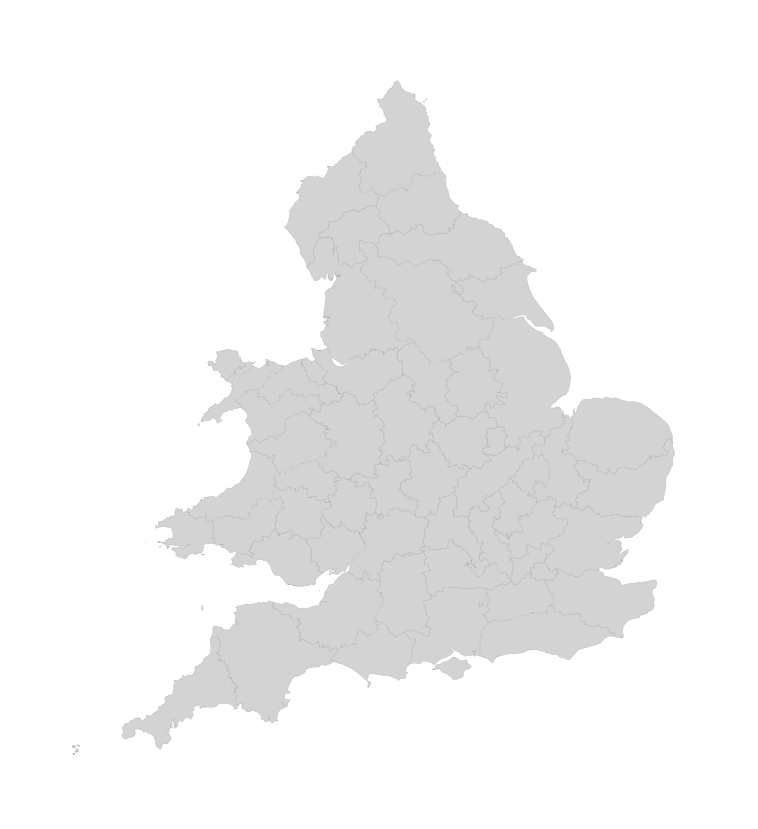

In [22]:
geoplot.polyplot(
    df=mapDF,
    
    projection=gcrs.AlbersEqualArea(), 
    edgecolor='darkgrey', 
    facecolor='lightgrey', 
    linewidth=.3,
    figsize=(20, 15), 
)

<AxesSubplot:>

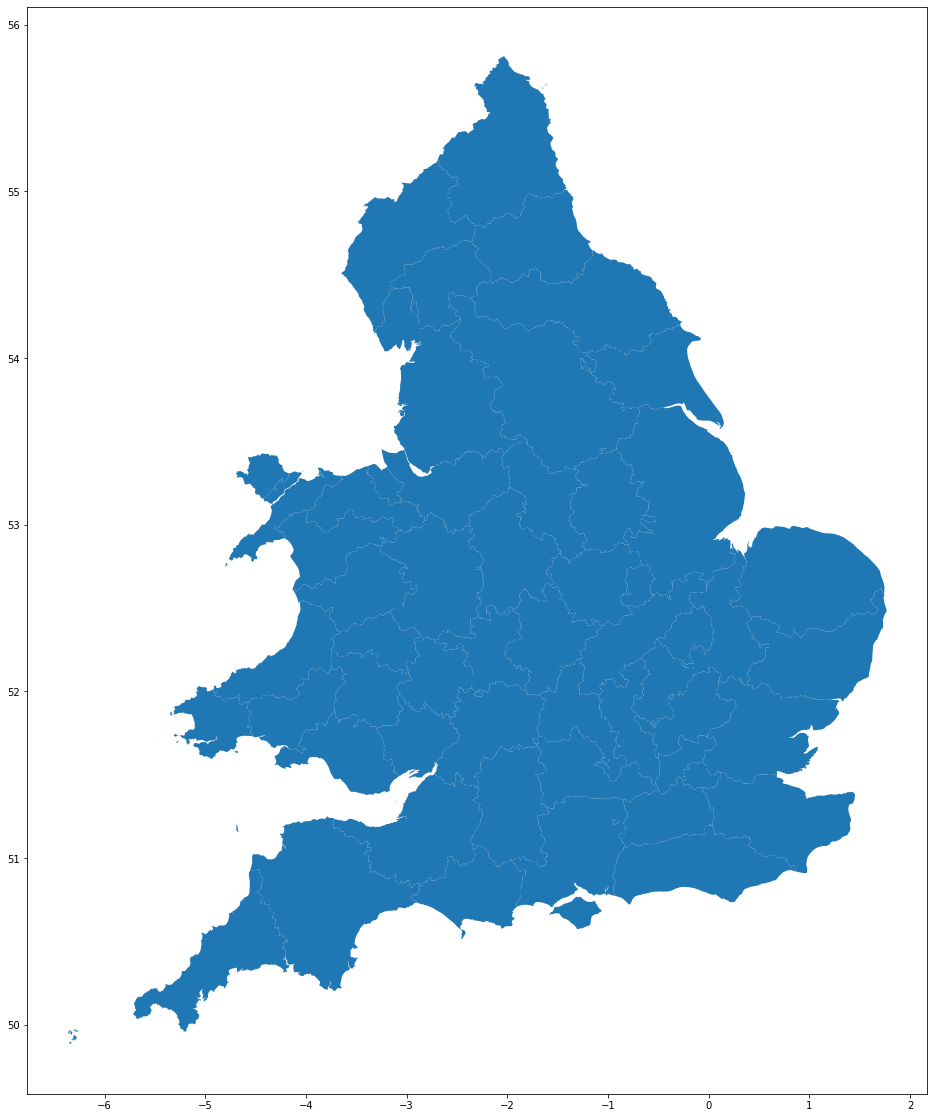

In [23]:
fig, ax = plt.subplots(figsize=(20,20))

mapDF.plot(ax=ax)

In [ ]:
###################################################################################################################################################
######################################################## general newspaper coverage ###############################################################
###################################################################################################################################################

In [35]:
coverage = pd.read_excel('coverage_over_time.xlsx', index_col=0)
coverage

,county,1690 - 1719,1720 - 1749,1750 - 1779,1780 - 1809,1810 - 1839,1840 - 1869
0,Anglesey,NaN,NaN,NaN,NaN,NaN,NaN
1,Bedfordshire,0.0,0.0,0.0,0.0,0.0,0.0
2,Berkshire,0.0,0.0,0.0,0.0,0.0,0.0
3,Brecknockshire,NaN,NaN,NaN,NaN,NaN,NaN
4,Buckinghamshire,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
51,Wiltshire,NaN,NaN,NaN,NaN,NaN,NaN
52,Worcestershire,0.0,0.0,0.0,0.0,0.0,3771.0
53,"Yorkshire, East Riding",NaN,NaN,NaN,NaN,NaN,NaN
54,"Yorkshire, North Riding",NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
for col in [col for col in coverage.columns if col != 'county']:
    coverage = coverage.rename(columns={col: f'coverage_{col.replace(" - ", "_")}'})
coverage.columns


Index(['county', 'coverage_1690_1719', 'coverage_1720_1749',
       'coverage_1750_1779', 'coverage_1780_1809', 'coverage_1810_1839',
       'coverage_1840_1869'],
      dtype='object')

In [37]:
for col in [col for col in coverage.columns if 'coverage' in col]:
    coverage[f'{col}_log'] = np.log(coverage[col] + 1)

coverage = coverage.replace(np.nan, 0)
coverage

,county,coverage_1690_1719,coverage_1720_1749,coverage_1750_1779,coverage_1780_1809,coverage_1810_1839,coverage_1840_1869,coverage_1690_1719_log,coverage_1720_1749_log,coverage_1750_1779_log,coverage_1780_1809_log,coverage_1810_1839_log,coverage_1840_1869_log
0,Anglesey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,Bedfordshire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,Berkshire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,Brecknockshire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,Buckinghamshire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,Wiltshire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
52,Worcestershire,0.0,0.0,0.0,0.0,0.0,3771.0,0.0,0.0,0.0,0.0,0.0,8.235361
53,"Yorkshire, East Riding",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
54,"Yorkshire, North Riding",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [38]:
mapWithCoverage = pd.merge(mapDF, coverage, on='county', how='left')
mapWithCoverage.drop(columns='geometry').head()

,G_UNIT,county,NAMESTATUS,G_LANGUAGE,UNITTYPE,IM_AUTH,label_coords,label_coords_cartesian,coverage_1690_1719,coverage_1720_1749,coverage_1750_1779,coverage_1780_1809,coverage_1810_1839,coverage_1840_1869,coverage_1690_1719_log,coverage_1720_1749_log,coverage_1750_1779_log,coverage_1780_1809_log,coverage_1810_1839_log,coverage_1840_1869_log
0,10152872,Northumberland,P,eng,PR_CNTY,GBHGIS,POINT (-2.07054 55.29688),POINT (-230491.193 7419698.177),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10134730,Cumberland,P,eng,PR_CNTY,GBHGIS,POINT (-3.10226 54.67149),POINT (-345341.486 7298367.393),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10061404,County Durham,P,eng,PR_CNTY,GBHGIS,POINT (-1.78417 54.72538),POINT (-198612.578 7308749.298),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10186079,Westmorland,P,eng,PR_CNTY,GBHGIS,POINT (-2.72416 54.43316),POINT (-303252.619 7252621.522),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10041776,North Riding,P,eng,PR_CNTY,GBHGIS,POINT (-1.37455 54.33343),POINT (-153014.318 7233558.962),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
[col for col in mapWithCoverage.columns if col.startswith('coverage') and col.endswith('log')]

['coverage_1690_1719_log',
 'coverage_1720_1749_log',
 'coverage_1750_1779_log',
 'coverage_1780_1809_log',
 'coverage_1810_1839_log',
 'coverage_1840_1869_log']

In [40]:
for timeCol in [col for col in mapWithCoverage.columns if col.startswith('coverage') and col.endswith('log')]:

    fig, ax = plt.subplots(figsize=(20,20))

    mapWithCoverage.plot(
        column=timeCol, 
        ax=ax, 
        cmap='viridis',
        legend=True,

        # style_kwds={'linewidth': .8}
        )


    for x, y, label in zip(mapWithCoverage.label_coords.x, mapWithCoverage.label_coords.y, mapWithCoverage.county.str.title()):
        plt.text(
            s=label, 
            x=x, 
            y=y,
            horizontalalignment='center', 
            fontdict={
                'color': 'white',
                'weight': 'bold', 
                'size': 8}, 
            )

    plt.tight_layout()
    plt.savefig(f'graphics/countyCoverage_{timeCol.replace("coverage_", "")}.png', dpi=300)
    plt.close('all')

In [ ]:
###################################################################################################################################################
########################################################### spectacle mentions ####################################################################
###################################################################################################################################################

In [3]:
spectacleMentions = pd.read_excel('spectacleMentions_over_time.xlsx', index_col=0)
spectacleMentions

,county,1690 - 1719,1720 - 1749,1750 - 1779,1780 - 1809,1810 - 1839,1840 - 1869
0,Anglesey,NaN,NaN,NaN,NaN,NaN,NaN
1,Bedfordshire,0.0,0.0,0.0,0.0,0.0,0.0
2,Berkshire,0.0,0.0,0.0,0.0,0.0,0.0
3,Brecknockshire,NaN,NaN,NaN,NaN,NaN,NaN
4,Buckinghamshire,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
51,Wiltshire,NaN,NaN,NaN,NaN,NaN,NaN
52,Worcestershire,0.0,0.0,0.0,0.0,0.0,1051.0
53,"Yorkshire, East Riding",NaN,NaN,NaN,NaN,NaN,NaN
54,"Yorkshire, North Riding",NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for col in [col for col in spectacleMentions.columns if col != 'county']:
    spectacleMentions = spectacleMentions.rename(columns={col: f'spectacleMentions_{col.replace(" - ", "_")}'})
spectacleMentions.columns

Index(['county', 'spectacleMentions_1690_1719', 'spectacleMentions_1720_1749',
       'spectacleMentions_1750_1779', 'spectacleMentions_1780_1809',
       'spectacleMentions_1810_1839', 'spectacleMentions_1840_1869'],
      dtype='object')

In [5]:
for col in [col for col in spectacleMentions.columns if 'spectacleMentions' in col]:
    spectacleMentions[f'{col}_log'] = np.log(spectacleMentions[col] + 1)

spectacleMentions = spectacleMentions.replace(np.nan, 0)
spectacleMentions

,county,spectacleMentions_1690_1719,spectacleMentions_1720_1749,spectacleMentions_1750_1779,spectacleMentions_1780_1809,spectacleMentions_1810_1839,spectacleMentions_1840_1869,spectacleMentions_1690_1719_log,spectacleMentions_1720_1749_log,spectacleMentions_1750_1779_log,spectacleMentions_1780_1809_log,spectacleMentions_1810_1839_log,spectacleMentions_1840_1869_log
0,Anglesey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,Bedfordshire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,Berkshire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,Brecknockshire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,Buckinghamshire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,Wiltshire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
52,Worcestershire,0.0,0.0,0.0,0.0,0.0,1051.0,0.0,0.0,0.0,0.0,0.0,6.958448
53,"Yorkshire, East Riding",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
54,"Yorkshire, North Riding",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [8]:
mapWithSpectacles = pd.merge(mapDF, spectacleMentions, on='county', how='left')
mapWithSpectacles.drop(columns='geometry').head()

,G_UNIT,county,NAMESTATUS,G_LANGUAGE,UNITTYPE,IM_AUTH,label_coords,label_coords_cartesian,spectacleMentions_1690_1719,spectacleMentions_1720_1749,spectacleMentions_1750_1779,spectacleMentions_1780_1809,spectacleMentions_1810_1839,spectacleMentions_1840_1869,spectacleMentions_1690_1719_log,spectacleMentions_1720_1749_log,spectacleMentions_1750_1779_log,spectacleMentions_1780_1809_log,spectacleMentions_1810_1839_log,spectacleMentions_1840_1869_log
0,10152872,Northumberland,P,eng,PR_CNTY,GBHGIS,POINT (-2.07054 55.29688),POINT (-230491.193 7419698.177),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10134730,Cumberland,P,eng,PR_CNTY,GBHGIS,POINT (-3.10226 54.67149),POINT (-345341.486 7298367.393),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10061404,County Durham,P,eng,PR_CNTY,GBHGIS,POINT (-1.78417 54.72538),POINT (-198612.578 7308749.298),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10186079,Westmorland,P,eng,PR_CNTY,GBHGIS,POINT (-2.72416 54.43316),POINT (-303252.619 7252621.522),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10041776,North Riding,P,eng,PR_CNTY,GBHGIS,POINT (-1.37455 54.33343),POINT (-153014.318 7233558.962),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
[col for col in mapWithSpectacles.columns if col.startswith('spectacleMentions') and col.endswith('log')]

['spectacleMentions_1690_1719_log',
 'spectacleMentions_1720_1749_log',
 'spectacleMentions_1750_1779_log',
 'spectacleMentions_1780_1809_log',
 'spectacleMentions_1810_1839_log',
 'spectacleMentions_1840_1869_log']

In [10]:
for timeCol in [col for col in mapWithSpectacles.columns if col.startswith('spectacleMentions') and col.endswith('log')]:

    fig, ax = plt.subplots(figsize=(20,20))

    mapWithSpectacles.plot(
        column=timeCol, 
        ax=ax, 
        cmap='viridis',
        legend=True,

        # style_kwds={'linewidth': .8}
        )


    for x, y, label in zip(mapWithSpectacles.label_coords.x, mapWithSpectacles.label_coords.y, mapWithSpectacles.county.str.title()):
        plt.text(
            s=label, 
            x=x, 
            y=y,
            horizontalalignment='center', 
            fontdict={
                'color': 'white',
                'weight': 'bold', 
                'size': 8}, 
            )

    plt.tight_layout()
    plt.savefig(f'graphics/countySpectacleMentions_{timeCol.replace("spectacleMentions_", "")}.png', dpi=300)
    plt.close('all')